# Classification with a control channel: Don't cheat yourself!

Gilles Louppe -- [@glouppe](https://twitter.com/glouppe) <br />
Tim Head -- [@betatim](https://twitter.com/betatim)

Last changes on August 2, 2015.

# Abstract

TODO

# Setting

## Notations

Let us assume a set of _cases_ or _objects_ taken from a universe $\Omega$. Let us further assume that each object is described by a set of _measurements_ and let us arrange these measurements in some pre-assigned order, i.e., take the input values to be $x_1, x_2, ..., x_p$, where $x_j \in {\cal X}_j$ (for $j=1, ..., p$) corresponds to the value of the input variable $X_j$. Together, the input values $(x_1, ..., x_p)$ form a $p$-dimensioal input vector ${\bf x}$ taking its values in ${\cal X}_1 \times ... \times {\cal X}_p = {\cal X}$, where ${\cal X}$ is defined as the input space. Similarly, let us define as $y \in {\cal Y}$ the value of the output variable $Y$, where ${\cal Y}$ is defined as the output space. By definition, both the input and the output spaces are assumed to respectively contain all possible input vectors and all possible output values. 

_Note._ Input variables are also known as _features_ or _descriptors_, input vectors as _instances_ or _samples_ and the output variable as _target_ or _response_.

## Supervised learning

Let us assume a learning set ${\cal L}$ composed of $N$ pairs of input vectors and output values $({\bf x}_1, y_1), ..., ({\bf x}_N, y_N)$, where ${\bf x}_i \in {\cal X}$ and $y_i \in {\cal Y}$. In this framework, the supervised learning task can be stated as learning a function (or _model_) $\varphi : {\cal X} \mapsto {\cal Y}$ from ${\cal L}$. In particular, the objective is to find a model such that its predictions $\varphi({\bf x})$, also denoted by the variable $\hat{Y}$, are as good as possible.

In the statistical sense, input and output variables $X_1, ..., X_p$ and $Y$ are _random variables_ taking jointly their values from ${\cal X} \times {\cal Y}$ with respect to the joint probability distribution $P(X, Y)$, where $X$ denotes the random vector $(X_1, ..., X_p)$. That is, $P(X={\bf x}, Y=y)$ is the probability that random variables $X$ and $Y$ take values ${\bf x}$ and $y$ from ${\cal X}$ and ${\cal Y}$ when drawing an object uniformly at random from the universe $\Omega$. Accordingly, trying to learn a model $\varphi_{\cal L}$ whose predictions are as good as possible can be stated as finding a model which minimizes or maximizes some scoring function in expectation over $X,Y$ (e.g., minimizing the expected prediction error or maximizing the expected ROC AUC).

In practice, simplifying assumptions are made to solve supervised learning. In particular, one often assumes that the very best model, or at least a good approximation of it, lives in a family ${\cal H}$ of candidate models, also known as _hypotheses_, of restricted structure (e.g., the family of linear models or the family of decision trees). In this sense, learning amounts to construct or find a model in ${\cal H}$ for which the scoring function is (supposedly) as low (resp. high) as possible.

# Classification of events in high energy physics

In high energy physics, experimentalists aim at building detectors for the observation and discovery of a phenomenon predicted by some theoretical model (e.g., the discovery of the Higgs boson, as predicted by the Standard Model). To achieve this, classifiers are built on simulated data and then used to evaluate real data as observed and recorded through the detector. Provided a classifier trained on simulated data properly transfers to real data, the goal is then to assess whether the predicted phenomenon does actually exist, with high probability. 

In machine learning terms, let us assume a universe of objects, or _events_, each described by a vector of physical input values ${\bf x} = (x_1, ..., x_p)$. Let us further assume that some of these events correspond to _signal_ ($y=s$), i.e. the phenomenon of interest, while the others correspond to _background_ ($y=b$), i.e. known and verified physical processes. 

In this setting, given a learning set ${\cal L}$ of simulated signal and simulated background, supervised learning algorithms can be used to find a model $\varphi : {\cal X} \mapsto {\cal Y}$, where ${\cal Y} = \{s, b\}$, capable of distinguishing signal from background events given physical input values.

## Control channel

Because simulation in itself might not be exempt of inaccuracies, caution should be taken when learning a classifier $\varphi$ not to exploit simulation artefacts -- which do not exist on real data -- to separate signal from background. Exploiting these imperfections in the simulation would indeed lead to a model whose simulation performance might significantly differ from its actual performance on real data, therefore making it far less reliable in an actual experiment pipeline. 

To enforce this, the learned classifier is usually required not to have a large discrepancy when applied to simulated and real data. In practice, this can be verified by evaluating whether the classifier behaves differently on simulated signal and real data signal from a _control channel_, i.e. a phenomenon with a topology similar to the phenomenon under study, but with a well-known and well-observed behavior. 

More formally, let us assume control channel events, comprising both simulated signal and real data signal from a close phenomenon, and respectively denoted as ${\cal C}^\text{sim} = \{  {\bf x}_1, ..., {\bf x}_{N_\text{sim}} \}$ and ${\cal C}^\text{data} = \{ {\bf x}_1, ..., {\bf x}_{N_\text{data}}\}$. We want to find a model $\varphi$ which is a good as possible, while ensuring that the distributions of $\varphi({\bf x})$ are not significantly different for ${\bf x} \in {\cal C}^\text{sim}$ than for ${\bf x} \in {\cal C}^\text{data}$. 

_Example._ An usual _control channel test_ consists in requiring the Kolmogorov-Smirnov statistic between the two samples $\{ \varphi({\bf x}) | {\bf x} \in {\cal C}^\text{sim} \}$ and $\{ \varphi({\bf x}) | {\bf x} \in {\cal C}^\text{data} \}$ to be strictly smaller than some pre-defined threshold $t$.

Equivalently, this can be stated as restricting the family ${\cal H}$ of candidate models to the family $\bar{{\cal H}} \subseteq {\cal H}$ for which the control channel test is verified. The open problem is then to adapt supervised learning algorithms to best navigate this restricted space of models. 


# Negative result: Control channel tests can be bypassed, even by chance

_Proposition._ Assuming that
1. control data can be distinguished from scoring data with high confidence,
2. simulated features are more discriminative than what they are in real data,

Then, even by chance, a learning procedure exploring $\bar{{\cal H}}$ might capture and exploit differences in control and scoring data to pass the control channel test and overfit with respect to real data.

_Corollary._ Even if the control channel test passes, the true performance of the classifier on real data may be significantly lower than expected.

_Corollary._ The choice of the control channel matters. The closer the distribution of the control signal to the distribution of the signal under study, the less likely the classifier will exploit the defects, and therefore the more reliable for a real data.

# Toy example

As an illustrative example, let us consider an artificial classification problem between signal and background events, along with some close control channel data ${\cal C}^\text{sim}$ and ${\cal C}^\text{data}$. Let us assume an input space defined on three input variables $X_1, X_2, X_3$,
such that 

- $X_0$ is irrelevant to discriminate between real data signal and real data background but, because of simulation imperfections, has discriminative power between simulated events and real data events ;
- $X_1$ is discriminative between signal and background events ;
- $X_2$ is discriminative between events from the original problem and the control channel.

In [51]:
%matplotlib inline

import numpy as np
np.random.seed = 1

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8, 8

In [52]:
# Generate data
from scipy.stats import norm

parameters = {
    "signal-data":      [(0, 1),     (2, 1),     (0, 1)],
    "signal-sim":       [(3, 1),     (2.2, 1),   (0, 1)],
    "background-data":  [(0, 1),     (-1, 1),    (0, 1)],
    "control-data":     [(0.3, 1.2), (2.3, 1.2), (3, 1)],
    "control-sim":      [(3.3, 1.2), (2.5, 1.2), (3, 1)],
}

def build(label, n_samples=10000): 
    p = parameters[label]
    
    X = np.empty((n_samples, 3))
    X[:, 0] = norm(*p[0]).rvs(n_samples)
    X[:, 1] = norm(*p[1]).rvs(n_samples)
    X[:, 2] = norm(*p[2]).rvs(n_samples)
    
    return X

X_signal_data = build("signal-data")
X_signal_sim = build("signal-sim")
X_background_data = build("background-data")
X_control_data = build("control-data")
X_control_sim = build("control-sim")

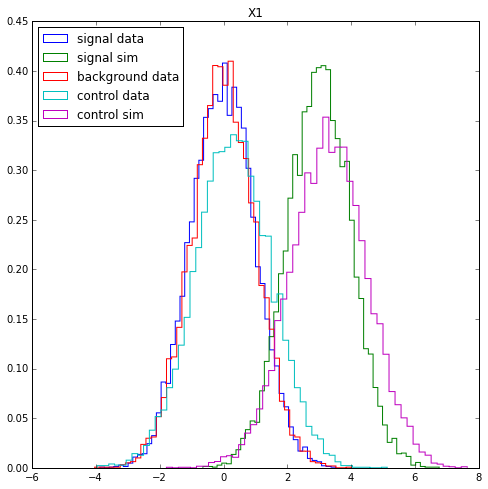

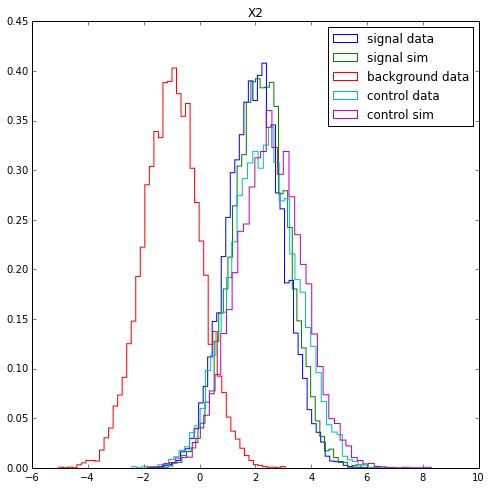

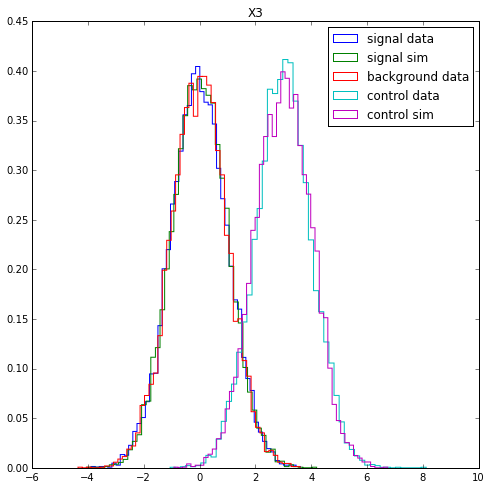

In [53]:
# Plot the distributions
for i in range(3):
    plt.hist(X_signal_data[:, i], normed=1, bins=50, histtype="step", label="signal data")
    plt.hist(X_signal_sim[:, i], normed=1, bins=50, histtype="step", label="signal sim")
    plt.hist(X_background_data[:, i], normed=1, bins=50, histtype="step", label="background data")
    plt.hist(X_control_data[:, i], normed=1, bins=50, histtype="step", label="control data")
    plt.hist(X_control_sim[:, i], normed=1, bins=50, histtype="step", label="control sim")
    plt.legend(loc="best")
    plt.title("X%d" % (i+1))

    plt.show()

Let us now build a random forest on simulated signal versus real data background:

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split

X = np.vstack((X_background_data, X_signal_sim))
y = np.concatenate((np.zeros(len(X_background_data)), np.ones(len(X_signal_sim))))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=1)
X_data = np.vstack((X_background_data, X_signal_data))
y_data = np.concatenate((np.zeros(len(X_background_data)), np.ones(len(X_signal_data))))

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

print "ROC AUC (simulated signal vs. data background) =", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print "ROC AUC (data signal vs. data background) =", roc_auc_score(y_data, rf.predict_proba(X_data)[:, 1])  

ROC AUC (simulated signal vs. data background) = 0.997950313436
ROC AUC (data signal vs. data background) = 0.937019965


As the results show, the true performance on real data signal and real data background events is significantly lower that the expected performance of the forest, as estimated on simulated signal and real data background events.

The Kolmogorov-Smirnov statistic on simulated signal and data signal events from the control channel is indeed quite large, suggesting the random forest has picked discrimative features between simulated and real data events rather than discriminative features between signal and background events.

In [55]:
from sklearn.metrics import roc_curve

def ks(pred_sim, pred_data):
    y = np.concatenate((np.ones(len(pred_sim)), np.zeros(len(pred_data))))
    pred = np.concatenate((pred_sim, pred_data))
    fpr, tpr, _ = roc_curve(y, pred)
    return np.max(np.abs(fpr - tpr))

print "KS statistic =", ks(rf.predict_proba(X_control_sim)[:, 1],
                           rf.predict_proba(X_control_data)[:, 1]) 

KS statistic = 0.685


Indeed, as the variable importances of the forest show, $X_1$ is used as discriminative variable, while it has in fact no power on real data:

In [56]:
rf.feature_importances_

array([ 0.45258408,  0.52840846,  0.01900746])

Let us now assume that we want to restrict our family of models to those for which the KS statistic is lower than `t=0.09`, as a way to prevent using simulation imperfections as discriminative features.

The open problem is now how to best navigate $\bar{{\cal H}}$? In lack of a better procedure, let us simply use a bruteforce exploration on the family of totally randomized trees:

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

def find_best_tree(threshold, X_train, y_train, 
                              X_test, y_test, 
                              X_data, y_data, 
                              X_control_sim, X_control_data, n_trials=5000):
    best_auc_test = 0
    best_auc_data = 0
    best_ks = 0
    best_tree = None

    for seed in range(n_trials):
        clf = ExtraTreesClassifier(n_estimators=1, max_features=1, max_leaf_nodes=5, random_state=seed)
        clf.fit(X_train, y_train)

        auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])   
        auc_data = roc_auc_score(y_data, clf.predict_proba(X_data)[:, 1])
        ks = compute_ks(clf.predict_proba(X_control_sim)[:, 1],
                        clf.predict_proba(X_control_data)[:, 1])

        if auc_test > best_auc_test and ks < threshold:
            best_auc_test = auc_test
            best_auc_data = auc_data
            best_ks = ks
            best_tree = clf
    
    return best_auc_test, best_auc_data, best_ks, best_tree

auc_test, auc_data, ks, tree = find_best_tree(0.09, X_train, y_train, 
                                                    X_test, y_test, 
                                                    X_data, y_data, 
                                                    X_control_sim, X_control_data)

print "ROC AUC (simulated signal vs. data background) =", auc_test
print "ROC AUC (data signal vs. data background) =", auc_data
print "KS statistic =", ks

ROC AUC (simulated signal vs. data background) = 0.985149847542
KS statistic = 0.0642


So, what just happened? By bruteforce (or chance), we have found a classifier that
1. has seemingly good test performance (AUC=0.985 on simulated signal versus real data background) 
2. passes the control channel test that we have defined.

All is good, and we should therefore expect the classifier not have used the simulation artefacts of $X_1$. 

Wrong. The expected ROC AUC on real data signal and real data background is significantly lower than our first estimate, suggesting that there is still something wrong. Indeed, the variable importances of the classifier reveals that $X_1$ is still used to discriminate between signal and background:

In [62]:
tree.feature_importances_

array([  2.50640920e-01,   7.49311985e-01,   4.70955047e-05])

Let us now look at tree that has been found:

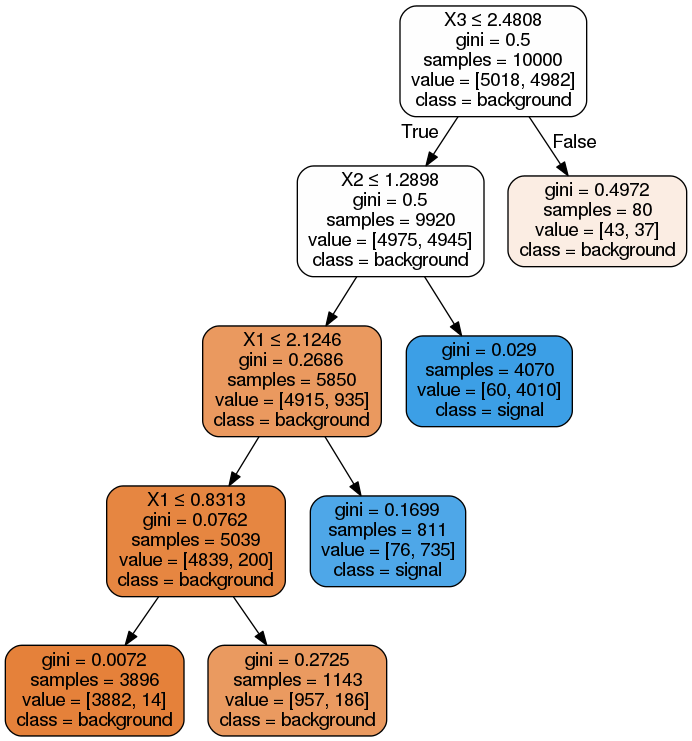

In [63]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
with open("tree.dot", 'w') as f:
    f = export_graphviz(tree.estimators_[0], out_file=f, feature_names=["X1", "X2", "X3"],  
                         class_names=["background", "signal"],  
                         filled=True, rounded=True,  
                         special_characters=True)
!dot -Tpng tree.dot -o tree.png
Image("tree.png")

As we can see, $X_3$ appears at the top of tree. Indeed, by chance, we have found that splitting on this variable allow to pass the test (since it separates control data from the rest) while letting all freedom in the child nodes to overfit on simulation artefacts, as the deeper splits on $X_1$ illustrate. 

Note that we never explicitly told the model to separate control data from training data. We merely explored the space of valid models at random and kept the best one which also passes the test. 

Finally, in light of this, a more efficient/malicious procedure than random exploration to obtain similar models might simply consists 
1. in learning to distinguish between training and control data,
2. build a classifier on training data, with all the freedom to overfit,
3. assign predictions to samples predicted as control data, so that the test is passed (e.g., random predictions in the case of the KS statistic), otherwise predict using the classifier found in the previous step.

... and indeed, this would work, as currently showed by our [2nd place](https://www.kaggle.com/c/flavours-of-physics/leaderboard) (August 2nd, LB score=0.989817) on the Finding τ → μμμ Kaggle challenge :)

# Conclusions

Control channel tests prevent some models to exploit simulation imperfections that are discriminative between simulation and real data, rather than between signal and background. As we have shown however, control channel tests do not exclude all such models: if control data can be distinguished from the training data, then these differences may be exploited, even unwillingly, to put control data aside and then overfit and simulation discrepancies.

Caution should therefore be taken: the obtained classifier might not be as reliable as estimated, even if control channel tests pass.

Finally, let us also stress that the choice of the control matters. The closer the distribution of the control signal to the distribution of the signal under study, the less likely the classifier will manage exploit the defects, and therefore the more reliable for a real data. The best control channel would be to use simulated signal real and data signal events from the _same_ phenomenon than the one under study. Unfortunately, this is a chicken and egg problem: we cannot have real data signal events since we are trying in the first place to verify if these exist in reality. 